# TITANIC SURVIVAL PREDICTION MODEL

The aim of this project is to predict the chances of survival for Titanic passengers using Classification techniques. Both training and testing datasets are extracted from Kaggle Competition. Model is training using train.csv, which has both the passenger details and survival outcome. Following that, model is applied on test.csv, which only contains the passenger details and no information about if the passenger survived or not. After submission to Kaggle, the best **accuracy of 0,76** was achieved with **Logistic Regression with hyperparameters tunning**.  

In [1]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter


#Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier


### 1. Load Dataset

In [2]:
train = pd.read_csv('titanictrain.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv('titanictest.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#check size of the data 
print ('Train data shape:', train.shape)
print ('Test data shape:', test.shape)

Train data shape: (891, 12)
Test data shape: (418, 11)


### 2. Dataset descripton

### 3. Exploratory data analysis (EDA)

In [7]:
# We try to find the relationship between each of the features and the Survival column

In [8]:
#Categorical variables: Sex, Pclass, Embarked 
#Numerical variables: SibSp, Parch, Age, Fare,

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Checking for null values

In [12]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

<AxesSubplot:>

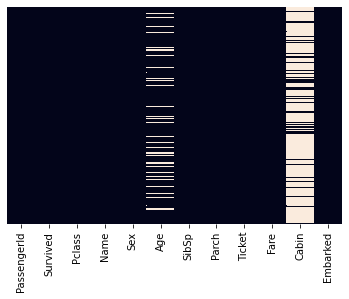

In [13]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

<AxesSubplot:>

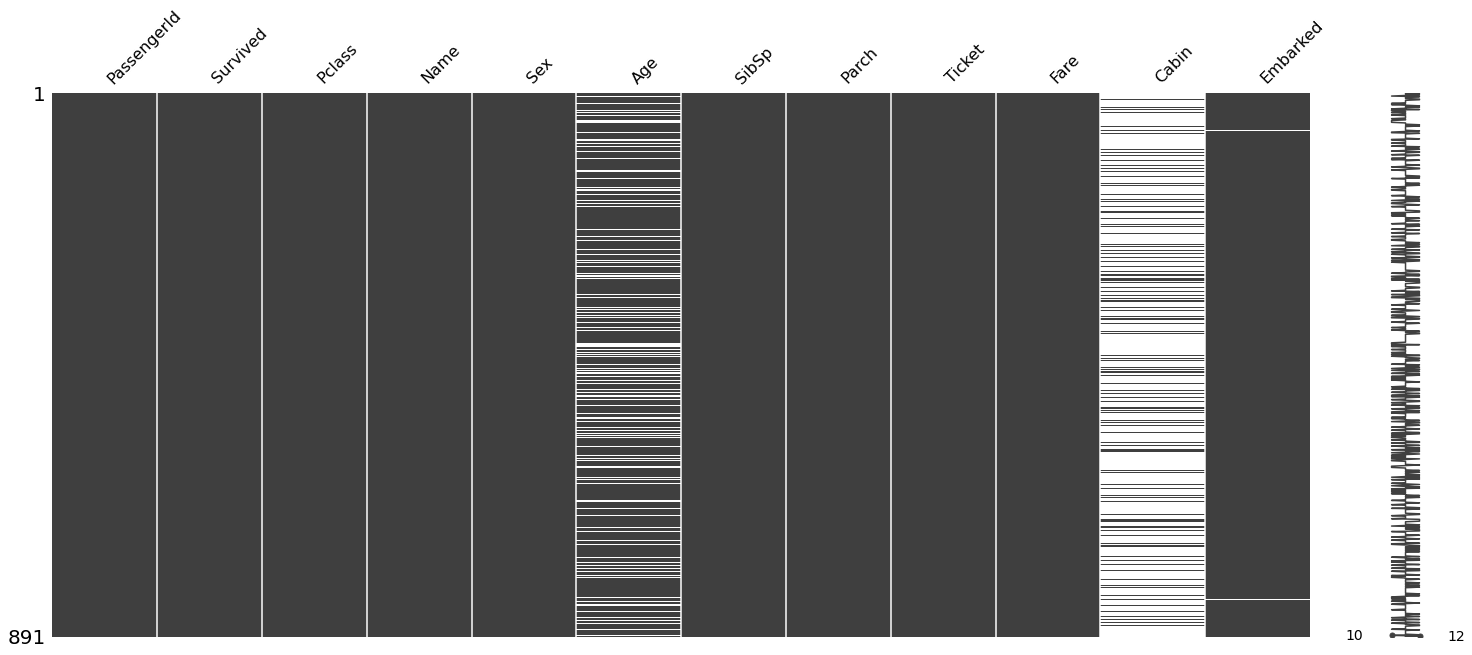

In [14]:
# missing data in training set with missingno library

missingno.matrix(train)

In [15]:
#missing values in percentage
missing_values=train.isnull().sum()
missing_values[missing_values>0]/len(train)*100

Age         19.865320
Cabin       77.104377
Embarked     0.224467
dtype: float64

### 3.1 Feature analysis


#### 3.1.2 Categorical variables

##### Categorical variable: Sex


In [16]:
# Value counts of the sex column

train['Sex'].value_counts(dropna = False)

# Comment: There are more male passengers than female passengers on titanic

male      577
female    314
Name: Sex, dtype: int64

In [17]:
# Mean of survival by sex

train[['Sex', 'Survived']].groupby('Sex', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

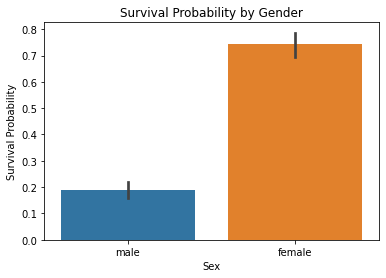

In [18]:
sns.barplot(x = 'Sex', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Gender')

# Comment: Female passengers are more likely to survive

<AxesSubplot:>

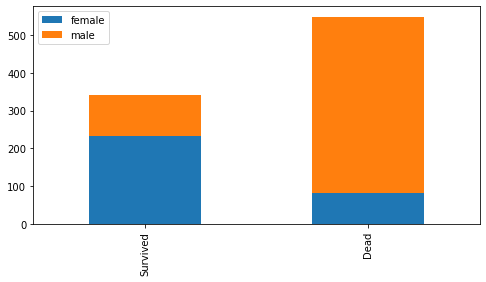

In [19]:
survived = train[train['Survived']==1]['Sex'].value_counts()
dead = train[train['Survived']==0]['Sex'].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ['Survived','Dead']
df_sex.plot(kind='bar',stacked = True, figsize = (8,4))

##### Categorical variable: Pclass

In [20]:
# Value counts of the Pclass column 

train['Pclass'].value_counts(dropna = False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [21]:
# Mean of survival by passenger class

train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

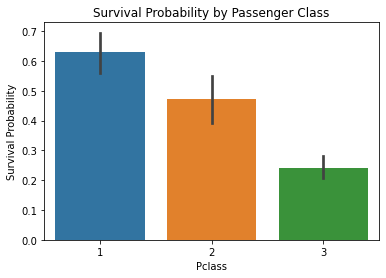

In [22]:
sns.barplot(x = 'Pclass', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

# Comment: Survival probability decrease with passenger class, first class passengers are prioritised during evacuation

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

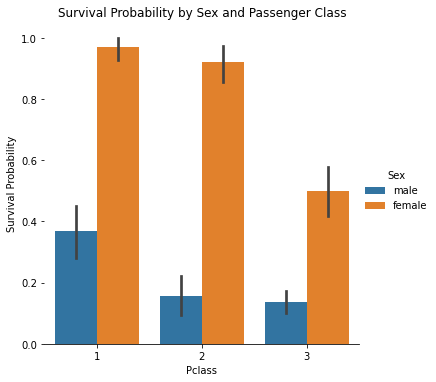

In [23]:
# Survival by gender and passenger class

g = sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
g.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')


##### Categorical variable: Embarked

In [24]:
# Value counts of the Embarked column 

train['Embarked'].value_counts(dropna = False)

# Comment: Two missing values in the Embarked column

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [25]:
# Mean of survival by point of embarkation

train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Survival Probability by Point of Embarkation')

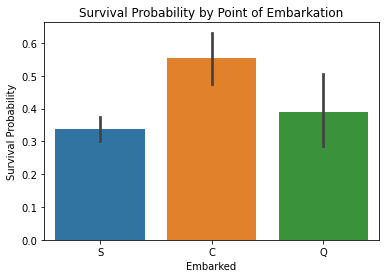

In [26]:
sns.barplot(x = 'Embarked', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Point of Embarkation')

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


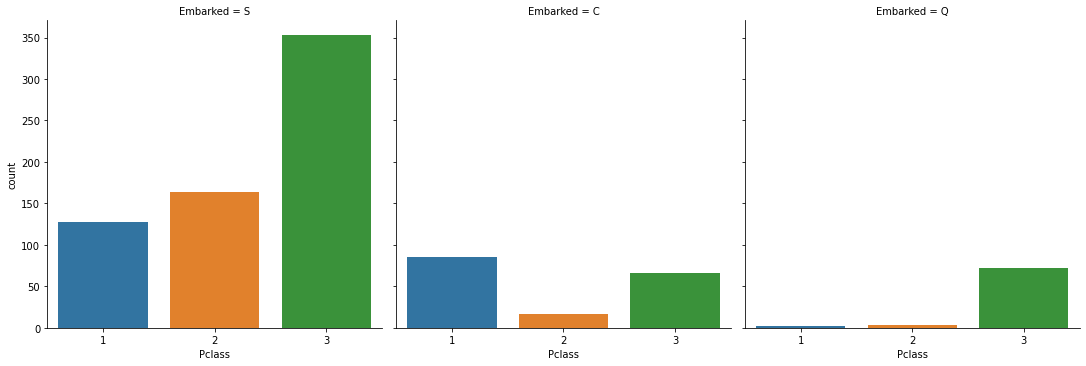

In [27]:
#distribution of Pclass in Embarked

sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


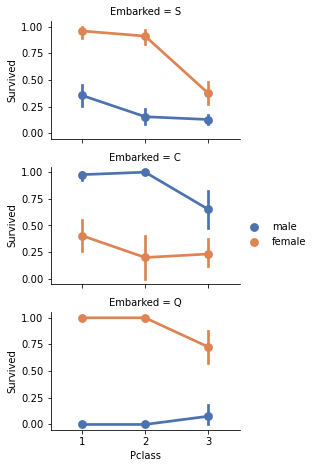

In [28]:
# Survival probability by all categorical variables

grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

#### 3.1.2 Numerical variables

In [29]:
#Numerical variables: SibSp, Parch, Age, Fare

##### Numeric variable: Age

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


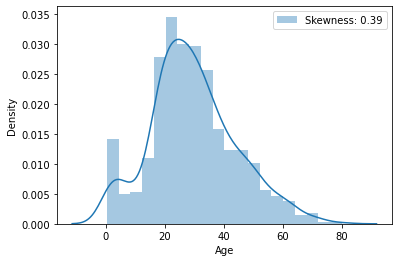

In [30]:
# Passenger age distribution

sns.distplot(train['Age'], label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
#plt.title('Passenger Age Distribution')

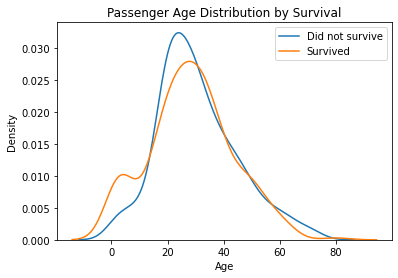

In [31]:
#Passenger Age Distribution by Survival

sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')
plt.legend()

#### Numerical variable: Fare

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Passenger Fare Distribution')

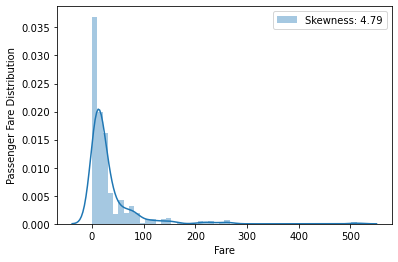

In [32]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [33]:
#Fare seems to have a high skewness. We will address this issue later on in the notebook via log transformation.

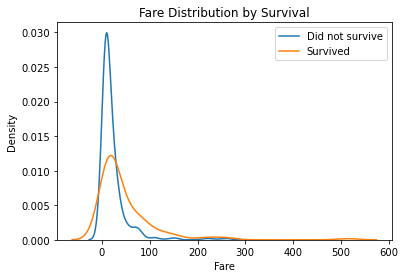

In [34]:
#Passenger Age Distribution by Survival

sns.kdeplot(train['Fare'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Fare'][train['Survived'] == 1], label = 'Survived')
plt.xlabel('Fare')
plt.title('Fare Distribution by Survival')
plt.legend()

In [35]:
train.sort_values('Fare', ascending = True).head(20)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0000,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0000,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0000,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0000,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0000,NaN,S


In [36]:
'''Plot indicates that people who did not pay for the ticket (probably crew) mostly did not survive'''


'Plot indicates that people who did not pay for the ticket (probably crew) mostly did not survive'

#### Numeric feature: Parch

In [37]:
# Value counts of the Parch column 

train['Parch'].value_counts(dropna = False)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [38]:
# Mean of survival by Parch

train[['Parch', 'Survived']].groupby('Parch', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Text(0.5, 1.0, 'Survival Probability by Parch')

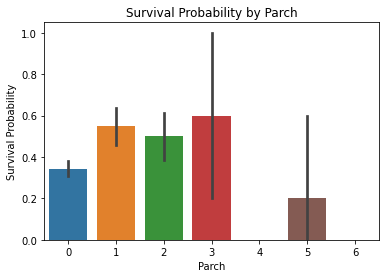

In [39]:
sns.barplot(x = 'Parch', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Parch')

#### Numeric feature: SibSp

In [40]:
# Value counts of the SibSp column 

train['SibSp'].value_counts(dropna = False)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [41]:
# Mean of survival by SibSp

train[['SibSp', 'Survived']].groupby('SibSp', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


Text(0.5, 1.0, 'Survival Probability by SibSp')

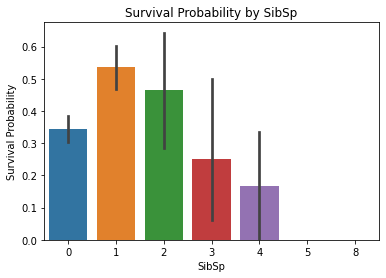

In [42]:
sns.barplot(x = 'SibSp', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by SibSp')

In [43]:
def detect_outliers(df, n, features):
    ''''
    This function will loop through a list of features and detect outliers in each one of those features. In each
    loop, a data point is deemed an outlier if it is less than the first quartile minus the outlier step or exceeds
    third quartile plus the outlier step. The outlier step is defined as 1.5 times the interquartile range. Once the 
    outliers have been determined for one feature, their indices will be stored in a list before proceeding to the next
    feature and the process repeats until the very last feature is completed. Finally, using the list with outlier 
    indices, we will count the frequencies of the index numbers and return them if their frequency exceeds n times.    
    '''
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print('We will drop these {} indices: '.format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


### 4. Data Preprocessing

Drop and fill missing values
Data trasformation (log transformation)
Feature engineering
Feature encoding

#### Drop Ticket column

In [44]:
train = train.drop(['Ticket', 'PassengerId'], axis=1)

In [45]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [46]:
# Missing values in training set 

train.isnull().sum().sort_values(ascending = False)

Cabin       687
Age         177
Embarked      2
Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

In [47]:
# Replacing Embarked with most frequent value

#The mode of a set of data values is the value that appears most often

mode_Emb = train['Embarked'].dropna().mode()[0]
mode_Emb

'S'

In [48]:
# Fill missing value in Embarked (categorical variable) with mode

train['Embarked'].fillna(mode_Emb, inplace = True)

#### Cabin missing values

In [49]:
#train['Cabin'] = ' '
#train.head()

In [50]:
train['Cabin'] = train['Cabin'].fillna(0)
for i in range(891):
    if(train.at[i,'Cabin']!=0):
        train.at[i,'Cabin']=1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S


<AxesSubplot:>

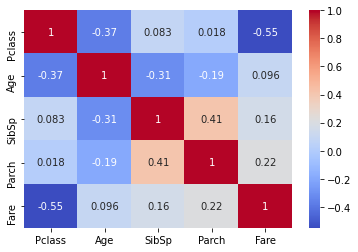

In [51]:
sns.heatmap(train.drop(['Survived', 'Name'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

Text(0, 0.5, 'Survival Probability')

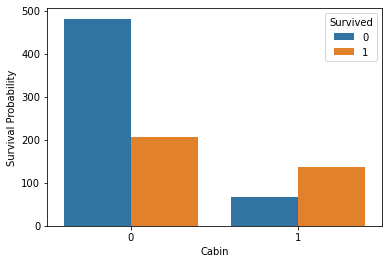

In [52]:
sns.countplot(x = 'Cabin', hue = 'Survived', data= train)
plt.ylabel('Survival Probability')


<AxesSubplot:>

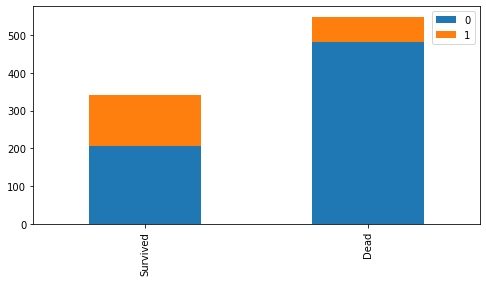

In [53]:
survived = train[train["Survived"]==1]["Cabin"].value_counts()
dead = train[train["Survived"]==0]["Cabin"].value_counts()
df_cabin = pd.DataFrame([survived,dead])
df_cabin.index = ["Survived","Dead"]
df_cabin.plot(kind="bar",stacked = True, figsize = (8,4))

#### We can see that Cabin has too many Null values, but most passengers that did not survive also did not have a cabin number

#### Name

In [54]:
for data in train:
    train['Prefix'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [55]:
train['Prefix'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

In [56]:
Prefixping = {'Mr':'Mr','Miss':'Miss','Mrs':'Mrs','Master':'Master','Dr':'Mr','Rev':'Mr','Major':'Mr','Mlle':'Miss','Col':'Mr','Capt':'Mr','Sir':'Mr','Ms':'Miss','Lady':'Mr','Mme':'Mrs','Countess':'Mr','Jonkheer':'Mr','Don':'Mr'}

In [57]:
for data in train:
    train['Prefix'] = train['Prefix'].map(Prefixping)


In [58]:
train.head(50)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,Mr
5,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,0,Q,Mr
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,1,S,Mr
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,0,S,Master
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,0,S,Mrs
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,0,C,Mrs


In [59]:
train['Prefix'].value_counts()

Mr        540
Miss      185
Mrs       126
Master     40
Name: Prefix, dtype: int64

Text(0.5, 1.0, 'Survival Probability by Prefix')

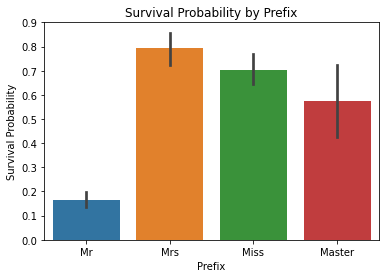

In [60]:
sns.barplot(x = 'Prefix', y ='Survived', data = train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Prefix')

#### Graph indicates that if you are woman or male or female kid, you have greater probability of survival rather than beeing a man

In [61]:
avg_Mr = round(train['Age'][train['Prefix']=='Mr'].mean())
avg_Miss = round(train['Age'][train['Prefix']=='Miss'].mean())
avg_Mrs = round(train['Age'][train['Prefix']=='Mrs'].mean())
avg_Master = round(train['Age'][train['Prefix']=='Master'].mean())
print('Average age for Mr : ',avg_Mr)
print('Average age for Miss : ',avg_Miss)
print('Average age for Mrs : ',avg_Mrs)
print('Average age for Master : ',avg_Master)


Average age for Mr :  33
Average age for Miss :  22
Average age for Mrs :  36
Average age for Master :  5


#### Filling out missing age values based on avarage age for different Prefix

In [62]:
# train.at - get value atspecific row/column pair


for data in train:
    train["Age"] = train["Age"].fillna(0)
    
for i in range(891):
    if(train.at[i,"Age"]==0):
        if(train.at[i,"Prefix"]=='Mr'):
            train.at[i,"Age"]=avg_Mr
        elif(train.at[i,"Prefix"]=='Miss'):
            train.at[i,"Age"]=avg_Miss
        elif(train.at[i,"Prefix"]=='Mrs'):
            train.at[i,"Age"]=avg_Mrs
        else:
            train.at[i,"Age"]=avg_Master

In [63]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,1,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,1,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,0,S,Mr


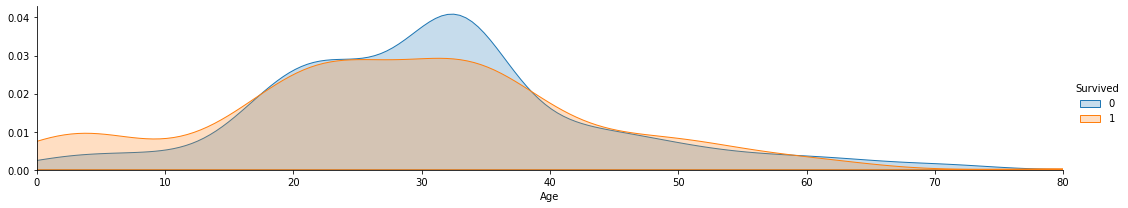

In [64]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()

In [65]:
# Convert Sex into numerical values where 0 = male and 1 = female

train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})

In [66]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,S,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,S,Mr


### Data Transformation

Fare column has a very high positive skewness. Therefore, log transformation will be applied to address this issue.

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution')

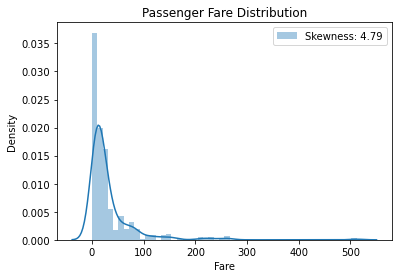

In [67]:
# Passenger fare distribution

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution')

In [68]:
# Apply log transformation to Fare column to reduce skewness

train['Fare'] = train['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Passenger Fare Distribution After Log Transformation')

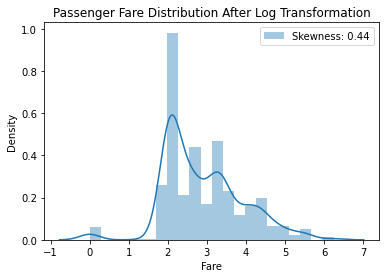

In [69]:
# Passenger fare distribution after log transformation

sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Fare Distribution After Log Transformation')


### Feature Encoding

In [70]:
# Convert Prefix into numerical values where 0 = Mr, 1 = Master, 2 = Miss, 3 = Mrs

# train['Prefix'] = train['Prefix'].map({'Mr': 0, 'Master': 1, 'Miss': 2, 'Mrs': 3})

In [71]:
# Convert Embarked into numerical values where S = 0, Q = 1, C = 2

# train['Embarked'] = train['Embarked'].map({'S': 0, 'Q': 1, 'C': 2})

<AxesSubplot:>

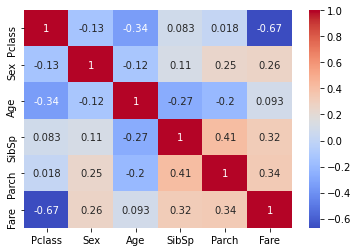

In [72]:
sns.heatmap(train.drop(['Survived', 'Name'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [73]:
# Encode Prefix and Embarked feature

train = pd.get_dummies(train, columns = ['Prefix'], prefix = 'Title', drop_first=True)
train = pd.get_dummies(train, columns = ['Embarked'], prefix = 'Em', drop_first=True)
train = pd.get_dummies(train, columns = ['Pclass'], prefix = 'Pclass', drop_first=True)
train.head()

,Survived,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Em_Q,Em_S,Pclass_2,Pclass_3
0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,1.981001,0,0,1,0,0,1,0,1
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,4.266662,1,0,0,1,0,0,0,0
2,1,"Heikkinen, Miss. Laina",1,26.0,0,0,2.070022,0,1,0,0,0,1,0,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,3.972177,1,0,0,1,0,1,0,0
4,0,"Allen, Mr. William Henry",0,35.0,0,0,2.085672,0,0,1,0,0,1,0,1


<AxesSubplot:>

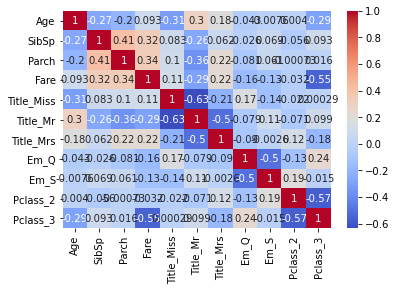

In [178]:
sns.heatmap(train.drop(['Survived'], axis = 1).corr(), annot = True, cmap = 'coolwarm')

In [75]:
train = train.drop(['Name','Sex'], axis = 1)
train.head()

,Survived,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Em_Q,Em_S,Pclass_2,Pclass_3
0,0,22.0,1,0,1.981001,0,0,1,0,0,1,0,1
1,1,38.0,1,0,4.266662,1,0,0,1,0,0,0,0
2,1,26.0,0,0,2.070022,0,1,0,0,0,1,0,1
3,1,35.0,1,0,3.972177,1,0,0,1,0,1,0,0
4,0,35.0,0,0,2.085672,0,0,1,0,0,1,0,1


## TEST DATASET

In [76]:
test = pd.read_csv('titanictest.csv')

In [77]:
test = test.drop(['Ticket'], axis=1)

In [78]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


##### In order to avoid overfitting, missing values in test data will be filled based on feature information from training data

In [79]:
# Missing values in test set 

test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Embarked         0
dtype: int64

##### Mean imputation works better if the distribution is normally-distributed or has a Gaussian distribution, while median imputation is preferable for skewed distribution(be it right or left).

In [80]:
# Fare has positevely (right) skewed distribution. Hence, median imputation is used.

median_Fare = train['Fare'].dropna().median()
median_Fare

2.6709850297651974

In [81]:
# Fill missing value in Fare (continuous variable) with median

test['Fare'].fillna(median_Fare, inplace = True)

In [82]:
test['Cabin'] = test['Cabin'].fillna(0)
for i in range(418):
    if(test.at[i,'Cabin']!=0):
        test.at[i,'Cabin']=1
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,S


In [83]:
for data in test:
    test['Prefix'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand = False)

In [84]:
for data in test:
    test['Prefix'] = test['Prefix'].map(Prefixping)


In [85]:
#filling missing age values BUT based on avarage values from train dataset


for data in test:
    test["Age"] = test["Age"].fillna(0)
    
for i in range(418):
    if(test.at[i,"Age"]==0):
        if(test.at[i,"Prefix"]=='Mr'):
            test.at[i,"Age"]=avg_Mr
        elif(test.at[i,"Prefix"]=='Miss'):
            test.at[i,"Age"]=avg_Miss
        elif(test.at[i,"Prefix"]=='Mrs'):
            test.at[i,"Age"]=avg_Mrs
        else:
            test.at[i,"Age"]=avg_Master

In [86]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,0,Q,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,0,S,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,0,Q,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,0,S,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,0,S,Mrs


In [87]:
# Apply log transformation to Fare column to reduce skewness

test['Fare'] = test['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

In [88]:
# Convert Sex into numerical values where 0 = male and 1 = female

test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Encode Prefix and Embarked feature

test = pd.get_dummies(test, columns = ['Prefix'], prefix = 'Title',drop_first=True)
test = pd.get_dummies(test, columns = ['Embarked'], prefix = 'Em',drop_first=True)
test = pd.get_dummies(test, columns = ['Pclass'], prefix = 'Pclass', drop_first=True)
test.head()

,PassengerId,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Em_Q,Em_S,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",0,34.5,0,0,2.057860,0,0,1,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,1.945910,0,0,0,1,0,1,0,1
2,894,"Myles, Mr. Thomas Francis",0,62.0,0,0,2.270836,0,0,1,0,1,0,1,0
3,895,"Wirz, Mr. Albert",0,27.0,0,0,2.159003,0,0,1,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,2.508582,0,0,0,1,0,1,0,1


In [89]:
test = test.drop(['Name'], axis = 1)

In [90]:
test = test.drop(['Sex'], axis = 1)

In [91]:
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Cabin,Title_Miss,Title_Mr,Title_Mrs,Em_Q,Em_S,Pclass_2,Pclass_3
0,892,34.5,0,0,2.057860,0,0,1,0,1,0,0,1
1,893,47.0,1,0,1.945910,0,0,0,1,0,1,0,1
2,894,62.0,0,0,2.270836,0,0,1,0,1,0,1,0
3,895,27.0,0,0,2.159003,0,0,1,0,0,1,0,1
4,896,22.0,1,1,2.508582,0,0,0,1,0,1,0,1


## 5. MODELING

### 5.1 Splitting data

In [92]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (891, 12)
Y_train shape:  (891,)
X_test shape:  (418, 12)


### 5.2 Predictions

#### 5.2.1 Logistic regression

In [110]:
logreg = LogisticRegression(solver='saga', max_iter=10000)
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

83.16

Submission of Log Reg

In [177]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [ ]:
submission.to_csv('submission.csv', index=False)

#### 5.2.1.1 Logistic Regression with Hyperparameter

In [129]:
# scaling
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler()

In [132]:
scaled_X_train = scaler.fit_transform(X_train)

In [133]:
scaled_X_test = scaler.transform(X_test)

In [112]:
#import Grid Search
from sklearn.model_selection import GridSearchCV

In [135]:
penalty = ['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)

param_grid = {'penalty':penalty,
             'l1_ratio':l1_ratio,
             'C':C}

In [155]:
grid_model = GridSearchCV(logreg,param_grid =param_grid, cv=5, verbose=True, n_jobs=-1)

In [156]:
grid_model.fit(scaled_X_train,Y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 2260 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 5990 tasks      | elapsed:   26.2s
[Parallel(n_jobs=-1)]: Done 6000 out of 6000 | elapsed:   26.3s finished
/Users/klaudiabyc/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=True)

In [157]:
grid_model.best_params_

{'C': 3.3598182862837818, 'l1_ratio': 0.0, 'penalty': 'l2'}

In [151]:
y_pred_log_grid = grid_model.predict(scaled_X_test)

In [152]:
acc_log = round(grid_model.score(scaled_X_train, Y_train) * 100, 2)
acc_log

83.28

##### Submission 

In [153]:
submission_log_grid = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_log_grid})
submission_log_grid.to_csv('submission_log_grid.csv', index=False)

#### 5.2.2 KNN

In [164]:
# Training data will be first splitted into training and test set

In [165]:
X = X_train
Y = Y_train
X_TEST = X_test

In [167]:
# scaling data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_TEST =  scaler.transform(X_TEST)
X


array([[-0.59077149,  0.43279337, -0.47367361, ...,  0.61583843,
        -0.51015154,  0.90258736],
       [ 0.61458609,  0.43279337, -0.47367361, ..., -1.62380254,
        -0.51015154, -1.10792599],
       [-0.28943209, -0.4745452 , -0.47367361, ...,  0.61583843,
        -0.51015154,  0.90258736],
       ...,
       [-0.59077149,  0.43279337,  2.00893337, ...,  0.61583843,
        -0.51015154,  0.90258736],
       [-0.28943209, -0.4745452 , -0.47367361, ..., -1.62380254,
        -0.51015154, -1.10792599],
       [ 0.162577  , -0.4745452 , -0.47367361, ..., -1.62380254,
        -0.51015154,  0.90258736]])

In [168]:
from sklearn.model_selection import train_test_split


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))


For k =  1  :  0.776536312849162
For k =  2  :  0.7877094972067039
For k =  3  :  0.8100558659217877
For k =  4  :  0.8100558659217877
For k =  5  :  0.8324022346368715
For k =  6  :  0.8100558659217877
For k =  7  :  0.8324022346368715
For k =  8  :  0.8268156424581006
For k =  9  :  0.8212290502793296
For k =  10  :  0.8156424581005587
For k =  11  :  0.8324022346368715
For k =  12  :  0.8268156424581006
For k =  13  :  0.8212290502793296
For k =  14  :  0.8156424581005587
For k =  15  :  0.8156424581005587
For k =  16  :  0.8100558659217877
For k =  17  :  0.8212290502793296
For k =  18  :  0.8100558659217877
For k =  19  :  0.8100558659217877


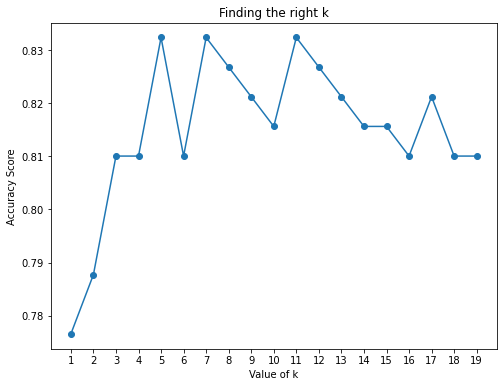

In [171]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [172]:
# the highest accuracy was achieved for k=5
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X,Y)
y_pred_knn = KNN.predict(X_TEST)

Submission of KNN

In [173]:
y_pred_knn

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [175]:
len(y_pred_knn)

418

In [174]:
submission_knn = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred_knn})
submission_knn.to_csv('submission_knn.csv', index=False)

In [176]:
submission_knn.shape

(418, 2)

#### 5.2.3 Support vector machines

In [830]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

73.85

Submission of SVM

In [ ]:
submission_svc = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred_svc})
submission_svc.to_csv('submission_svc.csv', index=False)

#### 5.2.4 Random forest

In [824]:
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.65

#### 5.2.5 Gaussian Naive Bayes

In [847]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

80.92

Submission of NB

In [ ]:
submission_NB = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred_NB})
submission_NB.to_csv('submission_NB.csv', index=False)

### Not in use

In [675]:
# Outliers in numerical variables

train.loc[outliers_to_drop, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
27,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,263.00,1,0,0
88,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,263.00,1,0,2
159,0,3,"Sage, Master. Thomas Henry",0,5.0,8,2,69.55,0,0,1
180,0,3,"Sage, Miss. Constance Gladys",1,22.0,8,2,69.55,0,0,2
201,0,3,"Sage, Mr. Frederick",0,33.0,8,2,69.55,0,0,0
324,0,3,"Sage, Mr. George John Jr",0,33.0,8,2,69.55,0,0,0
341,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,263.00,1,0,2
792,0,3,"Sage, Miss. Stella Anna",1,22.0,8,2,69.55,0,0,2
846,0,3,"Sage, Mr. Douglas Bullen",0,33.0,8,2,69.55,0,0,0
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,22.0,8,2,69.55,0,0,2


In [676]:
'''It is decided not to drop outliers because: 1) It is reasonable that one have 8 siblings and 
all individuals have the same surname 2) Cabin name could be just replace for C23 instead of being dropped)'''


'It is decided not to drop outliers because: 1) It is reasonable that one have 8 siblings and \nall individuals have the same surname 2) Cabin name could be just replace for C23 instead of being dropped)'